In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Ploting libs
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV, KFold
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/digit-recognizer/sample_submission.csv
/kaggle/input/digit-recognizer/test.csv
/kaggle/input/digit-recognizer/train.csv


In [2]:
train = pd.read_csv('/kaggle/input/digit-recognizer/train.csv')
test = pd.read_csv('/kaggle/input/digit-recognizer/test.csv')

In [3]:
print(f'Shape of trian data: {train.shape}')
print(f'Shape of test data: {test.shape}')

Shape of trian data: (42000, 785)
Shape of test data: (28000, 784)


In [4]:
train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
four = train.iloc[3, 1:].values.reshape((28,28))

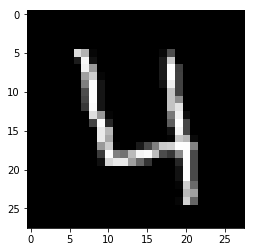

In [6]:
plt.imshow(four, cmap='gray')

In [7]:
train.label.unique()

array([1, 0, 4, 7, 3, 5, 8, 9, 2, 6])

In [8]:
train.label.astype('category').value_counts()/train.shape[0]*100

1    11.152381
7    10.478571
3    10.359524
9     9.971429
2     9.945238
6     9.850000
0     9.838095
4     9.695238
8     9.673810
5     9.035714
Name: label, dtype: float64

In [9]:
train.isnull().sum()

label       0
pixel0      0
pixel1      0
pixel2      0
pixel3      0
           ..
pixel779    0
pixel780    0
pixel781    0
pixel782    0
pixel783    0
Length: 785, dtype: int64

**Spliting into train test and validation data**

In [10]:
# Dependent and independent values
X = train.iloc[:7000, 1:]
y = train.iloc[:7000, 0]

In [11]:
# Spliting into train and test data
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

# Spliting training data into train and validation data
X_train, X_val, Y_train, Y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=101)

# Creating KNN 

In [12]:
knn = KNeighborsClassifier().fit(X_train, Y_train)

In [13]:
knn_pred = knn.predict(X_val)

In [14]:
confusion_matrix(Y_val, knn_pred)

array([[107,   0,   0,   0,   0,   0,   3,   0,   0,   1],
       [  0, 132,   1,   1,   0,   0,   1,   0,   0,   0],
       [  1,   4, 110,   0,   0,   1,   0,   4,   0,   0],
       [  1,   1,   0,  92,   0,   1,   0,   0,   1,   0],
       [  0,   1,   0,   0, 110,   0,   0,   0,   0,   9],
       [  0,   1,   0,   3,   0,  93,   1,   0,   0,   2],
       [  0,   0,   0,   0,   0,   2, 106,   0,   0,   0],
       [  0,   2,   0,   0,   0,   0,   0, 111,   0,   2],
       [  0,   4,   1,   4,   0,   0,   1,   0,  93,   4],
       [  1,   1,   1,   0,   3,   0,   1,   2,   0,  99]])

In [15]:
accuracy_score(Y_val, knn_pred)

0.9401785714285714

In [16]:
knn_test = knn.predict(x_test)

In [17]:
confusion_matrix(y_test, knn_test)

array([[132,   0,   0,   0,   0,   0,   2,   0,   0,   0],
       [  0, 142,   0,   0,   0,   0,   0,   0,   0,   1],
       [  3,   5, 122,   2,   1,   0,   0,   7,   3,   1],
       [  4,   1,   0, 148,   0,   0,   0,   0,   1,   0],
       [  0,   1,   0,   0, 122,   0,   1,   2,   0,   8],
       [  0,   3,   0,   6,   0, 116,   2,   0,   0,   0],
       [  5,   0,   0,   0,   0,   1, 131,   0,   0,   0],
       [  0,   7,   0,   0,   1,   0,   0, 155,   0,   4],
       [  1,   5,   0,   4,   2,   9,   1,   0, 113,   4],
       [  1,   2,   0,   0,   3,   0,   1,   8,   0, 106]])

In [18]:
accuracy_score(y_test, knn_test)

0.9192857142857143

# Linear SVC

In [19]:
SVC()

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [20]:
linear_svc = SVC(kernel='linear').fit(X_train, Y_train)

In [21]:
linear_svc_val = linear_svc.predict(X_val)
print('Results on validation data :\n')
print('Confusion matrix: \n{}'.format(confusion_matrix(Y_val, linear_svc_val)))
print('Accuracy : \n{}'.format(accuracy_score(Y_val, linear_svc_val)))

linear_svc_test = linear_svc.predict(x_test)
print('Results on testing data :\n')
print('Confusion matrix: \n{}'.format(confusion_matrix(y_test, linear_svc_test)))
print('Accuracy : \n{}'.format(accuracy_score(y_test, linear_svc_test)))

Results on validation data :

Confusion matrix: 
[[106   0   0   0   0   3   1   0   0   1]
 [  1 130   0   2   0   0   0   0   2   0]
 [  1   4 109   1   1   1   0   3   0   0]
 [  2   1   4  81   0   3   0   0   4   1]
 [  0   1   0   1 112   0   0   1   0   5]
 [  1   1   3   8   0  80   4   0   3   0]
 [  0   0   1   0   1   2 103   0   1   0]
 [  0   1   1   0   2   0   0 105   1   5]
 [  0   4   2   5   0   5   0   0  88   3]
 [  0   1   1   0   4   0   0   4   0  98]]
Accuracy : 
0.9035714285714286
Results on testing data :

Confusion matrix: 
[[131   0   0   0   0   1   2   0   0   0]
 [  0 141   0   0   0   0   0   0   0   2]
 [  2   2 127   1   4   1   1   3   2   1]
 [  1   3   1 137   0   7   0   0   5   0]
 [  1   1   0   0 122   0   3   0   0   7]
 [  1   3   2   8   0 110   2   0   1   0]
 [  4   0   1   0   0   2 130   0   0   0]
 [  1   1   3   0   3   0   0 153   0   6]
 [  2   2   2   8   0   6   0   1 117   1]
 [  2   0   0   3   3   2   0   7   2 102]]
Accuracy : 


# Non linear SVC (Polynomial kernel)

In [22]:
non_linear_svc = SVC(kernel='poly').fit(X_train, Y_train)
non_linear_svc_val = non_linear_svc.predict(X_val)
non_linear_svc_test = non_linear_svc.predict(x_test)

/opt/conda/lib/python3.6/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [23]:
print('Results on validation data :\n')
print('Confusion matrix: \n{}'.format(confusion_matrix(Y_val, non_linear_svc_val)))
print('Accuracy : \n{}'.format(accuracy_score(Y_val, non_linear_svc_val)))

print('Results on testing data :\n')
print('Confusion matrix: \n{}'.format(confusion_matrix(y_test, non_linear_svc_test)))
print('Accuracy : \n{}'.format(accuracy_score(y_test, non_linear_svc_test)))

Results on validation data :

Confusion matrix: 
[[108   0   0   0   0   1   1   1   0   0]
 [  0 131   0   2   0   1   0   1   0   0]
 [  1   4 109   0   1   1   1   3   0   0]
 [  0   1   3  87   0   2   1   0   2   0]
 [  0   1   0   0 115   0   0   1   0   3]
 [  1   0   0   1   0  93   2   0   2   1]
 [  0   0   0   0   1   0 106   0   1   0]
 [  1   0   0   0   1   0   0 111   1   1]
 [  0   2   0   1   0   1   0   1 101   1]
 [  0   0   0   0   5   0   0   0   0 103]]
Accuracy : 
0.95
Results on testing data :

Confusion matrix: 
[[132   0   0   0   0   1   1   0   0   0]
 [  0 139   0   1   0   0   0   0   1   2]
 [  1   2 128   4   2   0   1   3   2   1]
 [  3   2   0 146   0   1   0   0   2   0]
 [  0   0   0   0 129   0   2   0   0   3]
 [  0   3   0   5   0 116   2   0   1   0]
 [  5   0   1   0   0   0 130   0   1   0]
 [  1   2   1   2   0   0   0 158   0   3]
 [  1   2   0   4   0   4   0   0 126   2]
 [  2   1   0   1   3   0   1   8   0 105]]
Accuracy : 
0.935


In [24]:
test_pred = non_linear_svc.predict(test)

In [25]:
test_pred.shape

(28000,)

In [26]:
output = pd.DataFrame({'ImageId': test.index+1, 'Label': test_pred })
output.set_index('ImageId', inplace=True)
output.head()

,Label
ImageId,
1,2
2,0
3,9
4,9
5,3


In [27]:
output.to_csv('submission.csv', index=True, header=True)